# Lesson 01 - Workflow and Data Adjustments

starting all the previous tasks did before: collecting the data, preprocessing it.

In [1]:
import pandas as pd
import numpy as np

# COVID-19 - Clinical Data to assess diagnosis

In [2]:
url = 'https://github.com/alura-cursos/covid-19-clinical/blob/main/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx?raw=true'
patients = pd.read_excel(url)

patients.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1


In [3]:
def fill_df_continuous_vars(df: pd.DataFrame):
    
    continuous_features_cols = df.iloc[:, 13:-2].columns

    # it has a mistake: when I group and do fillna, I need to group it again to apply fillna again
    # in the way made below some data from different patients are leaking in the ffill, because it's
    # not grouped anymore.
    filled_continuous_features = (df.groupby('PATIENT_VISIT_IDENTIFIER')
                                  [continuous_features_cols]
                                  .fillna(method='bfill')
                                  .fillna(method='ffill')
                                  .reset_index())
    
    categorical_features = df.iloc[:, :13]
    
    output = df.iloc[:, -2:]
    
    return pd.concat([categorical_features, filled_continuous_features, output], axis=1)

In [4]:
patients_filled = fill_df_continuous_vars(patients)

patients_cannot_be_used = (patients_filled
                               .query("WINDOW == '0-2' & ICU == 1")
                               ['PATIENT_VISIT_IDENTIFIER']
                               .values)

patients_cleaned = patients_filled.query('PATIENT_VISIT_IDENTIFIER not in @patients_cannot_be_used')

patients_cleaned = patients_cleaned.dropna()

patients_cleaned.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1760.000000,1760.000000,1760.000000,1760.00000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,...,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000
mean,192.818182,0.457386,0.380682,0.11250,0.026136,0.101705,0.021591,0.132955,0.049432,0.212500,...,-0.778209,-0.823458,-0.915593,-0.828593,-0.774857,-0.854690,-0.788155,-0.824412,-0.915552,0.201705
std,110.637724,0.498322,0.485692,0.31607,0.159586,0.302345,0.145385,0.339622,0.216829,0.409193,...,0.411909,0.276279,0.247695,0.287696,0.368311,0.240338,0.384405,0.274953,0.248093,0.401387
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,97.750000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,191.500000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
75%,289.250000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.764706,-0.738095,-0.919192,-0.726087,-0.651942,-0.771625,-0.756272,-0.736640,-0.920103,0.000000
max,384.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.333333,1.000000,1.000000,1.000000,1.000000,1.000000,0.329660,1.000000,1.000000


In [5]:
def window_prepare(rows):
    # check if that patient went to UCI, if yes
    if(np.any(rows['ICU'])):
        # attribute 1 for ICU in the row which the window is 0-2
        rows.loc[rows.WINDOW == '0-2', 'ICU'] = 1
        
    return rows.loc[rows.WINDOW == '0-2']

In [6]:
patients_cleaned = \
    (patients_cleaned
        .groupby('PATIENT_VISIT_IDENTIFIER')
        .apply(window_prepare))

patients_cleaned.head()

,,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
2,10,2,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-0.959596,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000,-0.961262,0-2,1
3,15,3,0,40th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
4,20,4,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.952381,-0.979798,-1.000000,-0.883669,-0.956805,-0.870968,-0.953536,-0.980333,0-2,0
5,25,5,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.976190,-0.979798,-0.860870,-0.714460,-0.986481,-1.000000,-0.975891,-0.980129,0-2,0


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

np.random.seed(73246)

In [8]:
x_columns = patients_cleaned.describe().columns

y = patients_cleaned['ICU']
x = patients_cleaned[x_columns].drop('ICU', axis=1)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)

In [10]:
dummy_model = DummyClassifier()
dummy_model.fit(x_train, y_train)

y_prediction_d = dummy_model.predict(x_test)
accuracy_score(y_test, y_prediction_d)

/home/gabriela/.local/lib/python3.6/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


0.48863636363636365

In [11]:
LR_model = LogisticRegression(max_iter=10000)
LR_model.fit(x_train, y_train)

y_prediction_LR = LR_model.predict(x_test)
accuracy_score(y_test, y_prediction_LR)

0.7045454545454546

### A fail in module 5 was the use pf `.describe().columns` to filter the columns for the `x` variable. It may have disregarded some columns.

Below I check which columns were disregarded.

In [12]:
for column in patients.columns:    
    if column not in x_columns:
        print(column)

AGE_PERCENTIL
WINDOW


In [13]:
patients[['AGE_PERCENTIL', 'WINDOW']].head()

,AGE_PERCENTIL,WINDOW
0,60th,0-2
1,60th,2-4
2,60th,4-6
3,60th,6-12
4,60th,ABOVE_12


- `AGE_PERCENTIL` can be an important variable for the model training.
- On the other hand `WINDOW` is not important because we selected a specific window.

### Converting `AGE_PERCENTIL` to float or int

Logistic Regression model will not work if this variable is a string.

In [14]:
patients_cleaned.AGE_PERCENTIL

PATIENT_VISIT_IDENTIFIER      
0                         0             60th
2                         10            10th
3                         15            40th
4                         20            10th
5                         25            10th
                                     ...    
380                       1900          40th
381                       1905    Above 90th
382                       1910          50th
383                       1915          40th
384                       1920          50th
Name: AGE_PERCENTIL, Length: 352, dtype: object

In [15]:
patients_cleaned.AGE_PERCENTIL.astype('category').cat.codes

PATIENT_VISIT_IDENTIFIER      
0                         0       5
2                         10      0
3                         15      3
4                         20      0
5                         25      0
                                 ..
380                       1900    3
381                       1905    9
382                       1910    4
383                       1915    3
384                       1920    4
Length: 352, dtype: int8

In [16]:
patients_usable = patients_cleaned.copy()

patients_usable['AGE_PERCENTIL'] = \
    patients_usable.AGE_PERCENTIL.astype('category').cat.codes

In [17]:
patients_usable.head()

,,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
2,10,2,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-0.959596,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000,-0.961262,0-2,1
3,15,3,0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
4,20,4,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.952381,-0.979798,-1.000000,-0.883669,-0.956805,-0.870968,-0.953536,-0.980333,0-2,0
5,25,5,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.976190,-0.979798,-0.860870,-0.714460,-0.986481,-1.000000,-0.975891,-0.980129,0-2,0


### Redefining `x_columns`

In [18]:
x_columns = patients_usable.columns

y = patients_usable['ICU']
x = patients_usable[x_columns].drop(['ICU', 'WINDOW'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)

### Training models again

In [19]:
dummy_model = DummyClassifier()
dummy_model.fit(x_train, y_train)

y_prediction_d = dummy_model.predict(x_test)
accuracy_score(y_test, y_prediction_d)

/home/gabriela/.local/lib/python3.6/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


0.5795454545454546

In [20]:
LR_model = LogisticRegression(max_iter=10000)
LR_model.fit(x_train, y_train)

y_prediction_LR = LR_model.predict(x_test)
accuracy_score(y_test, y_prediction_LR)

0.6590909090909091

### Challenge 01: Convert `AGE_PERCENTIL` column into categorical data, use a different way than we already did to do that.

see scikit learn library method that can do that.

In [21]:
patients[['AGE_PERCENTIL']]

,AGE_PERCENTIL
0,60th
1,60th
2,60th
3,60th
4,60th
...,...
1920,50th
1921,50th
1922,50th
1923,50th


In [22]:
from sklearn.preprocessing import OrdinalEncoder


enc = OrdinalEncoder()
patients['AGE_PERCENTIL_ENCODED'] = enc.fit_transform(patients[['AGE_PERCENTIL']])

patients['AGE_PERCENTIL_ENCODED']

0       5.0
1       5.0
2       5.0
3       5.0
4       5.0
       ... 
1920    4.0
1921    4.0
1922    4.0
1923    4.0
1924    4.0
Name: AGE_PERCENTIL_ENCODED, Length: 1925, dtype: float64

In [23]:
patients['AGE_PERCENTIL_ENCODED'].unique()

array([5., 8., 0., 3., 6., 1., 4., 7., 2., 9.])

# Lesson 02 - Evaluation Metrics

## Lesson 02 - Part 01 - Confusion Matrix

Recap last challenge: The categories created can impact on the model. 

All the dataset values are normalized between 0 and 1. However the `AGE_PERCENTIL` values are not following this.

It can affects our model.

**Challenge 01: Check the impact of using different categories for `AGE_PERCENTIL` on the model results.**

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [25]:
DTC_model = DecisionTreeClassifier()
DTC_model.fit(x_train, y_train)

y_prediction_DTC = DTC_model.predict(x_test)
accuracy_score(y_test, y_prediction_DTC)

0.6931818181818182

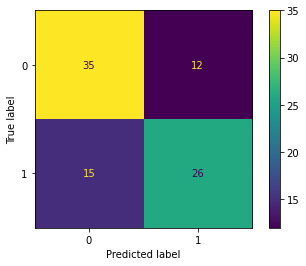

In [26]:
plot_confusion_matrix(DTC_model, x_test, y_test)

- For True Label equals 1 - when the patient needs ICU, the model predicted 16 wrongly and 25 correctly.

- What is the impact of wrong answers for this problem? What if the model predicts that the patient needs ICU bed and it's wrong? Or, what if the model predicts that the patient doesn't need ICU bed and it's wrong?

### For this problem is really important to make sure that for patients who need ICU the model gives the right answer.


- Confusion Matrix:
    - True Positive: label and prediction are true. Ex: 25
    - True Negative: label and prediction are false. Ex: 36
    - False Positive: label is false, prediction is true. Ex: 11
    - False Negative: label is true, prediction is false. Ex: 16

In [27]:
from sklearn.metrics import classification_report

In [28]:
print(classification_report(y_test, y_prediction_DTC))

              precision    recall  f1-score   support

           0       0.70      0.74      0.72        47
           1       0.68      0.63      0.66        41

    accuracy                           0.69        88
   macro avg       0.69      0.69      0.69        88
weighted avg       0.69      0.69      0.69        88



- F1: The F1 score is a measure of a test’s accuracy. F1 Score is the harmonic mean between precision and recall. \
    The range for F1 Score is [0, 1]. 1 = (perfect precision and recall).\
    It tells how precise your classifier is (how many instances it classifies correctly), as well as how robust it is (it does not miss a significant number of instances).\
    The greater the F1 Score, the better is the performance of our model.
    
    
- Precision : **TP/(TP+FP)**. It's (the number of correct positive results) / (the number of positive results predicted). \
    attempts to answer “What proportion of positive identifications was actually correct?”. \
precision_score(y_true, y_pred, average=None)


- Recall : **TP/(TP+FN)**. It's (the number of correct positive results) / (the number of all relevant samples (all samples that should have been identified as positive)). \
    attempts to answer “What proportion of actual positives was identified correctly?”. \
recall_score(y_true, y_pred, average=None)


In [29]:
# precision
# dos que eu to marcando como verdadeiro, faz sentido? 
# pense em um caso de investimento

25 / (25+11)

0.6944444444444444

In [30]:
# recall
# no caso de saúde o falso negativo pode ser muito ruim
# de todas as classes positivas, quantas estão corretas?

25 / (25+16)

0.6097560975609756

In [31]:
p = 0.5
r = 0.5

f1 = 2*p*r / (p+r)

print(f1)

0.5


In [32]:
p = 1.0
r = 0.2

f1 = 2*p*r / (p+r)

print(f1)

0.33333333333333337


- F1 is closer to the lower value.

- Through F1 Score we can see if precision or recall is low. If the mean is not harmonic we cannot notice when precision or recall is low.


**Challenge 02: Search about F-Score.**

**Challenge 03: Plot the Decision Tree.**

### Challenge 01: Check the impact of using different categories for `AGE_PERCENTIL` on the model results.

In [33]:
patients_cleaned_enconded = patients_cleaned.copy()

patients_cleaned_enconded['AGE_PERCENTIL'] = \
    enc.fit_transform(patients_cleaned[['AGE_PERCENTIL']])

In [34]:
x_columns = patients_cleaned_enconded.columns

x_age_percentil_encoded = \
    patients_cleaned_enconded[x_columns].drop(['ICU', 'WINDOW'], 
                                              axis=1)

x_train_2, x_test_2, y_train, y_test = train_test_split(x_age_percentil_encoded, 
                                                        y, stratify=y)

In [35]:
x_test_2.head()

,,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,,
57,285,57,1,7.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.893130,-1.000000,-0.976190,-1.000000,-0.860870,-1.000000,-0.877258,-1.000000,-0.975823,-1.000000
75,375,75,1,5.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
327,1635,327,1,7.0,1,0.0,0.0,0.0,0.0,1.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
275,1375,275,1,7.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
263,1315,263,1,9.0,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.816794,-0.823529,-0.928571,-0.979798,-0.922128,-0.718121,-0.836524,-0.794355,-0.928175,-0.980232


In [36]:
x_train.head()

,,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,,
103,515,103,1,9,0,0.0,0.0,0.0,0.0,1.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
321,1605,321,1,5,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.938931,-0.647059,-0.904762,-0.878788,-0.735456,-0.986967,-0.948667,-0.686636,-0.905024,-0.881390
276,1380,276,0,4,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-0.939394,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.936785
345,1725,345,1,9,1,0.0,0.0,0.0,0.0,1.0,0.0,...,-1.000000,-1.000000,-1.000000,-0.959596,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.960463
365,1825,365,1,6,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000


In [37]:
# using age_percentil_encoded variable

LR_model_2 = LogisticRegression(max_iter=10000)
LR_model_2.fit(x_train_2, y_train)

y_prediction_LR_2 = LR_model_2.predict(x_test_2)
accuracy_score(y_test, y_prediction_LR_2)

0.7386363636363636

In [38]:
LR_model = LogisticRegression(max_iter=10000)
LR_model.fit(x_train, y_train)

y_prediction_LR = LR_model.predict(x_test)
accuracy_score(y_test, y_prediction_LR)

0.42045454545454547

In [39]:
# using age_percentil_encoded variable

DTC_model_2 = DecisionTreeClassifier()
DTC_model_2.fit(x_train_2, y_train)

y_prediction_DTC_2 = DTC_model_2.predict(x_test_2)
accuracy_score(y_test, y_prediction_DTC_2)

0.5681818181818182

In [40]:
DTC_model = DecisionTreeClassifier()
DTC_model.fit(x_train, y_train)

y_prediction_DTC = DTC_model.predict(x_test)
accuracy_score(y_test, y_prediction_DTC)

0.42045454545454547

- It seems that using `AGE_PERCENTIL` ENCODED - coded through OrdinalEncoder Scikit Learn - the results are better.

### Challenge 02: Search about F-Score.

From wikipedia https://en.wikipedia.org/wiki/F-score:

Just to keep in mind:
![](https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/350px-Precisionrecall.svg.png)

The **traditional F-measure or balanced F-score (F1 score)** is the _harmonic mean_ of precision and recall:
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/9c94f59b68f5ae0dc92185906c7ec4214fd04e1e)

$F_\beta$ \
A more general F score, $F_\beta$, that uses a positive real factor β, where β is chosen such that recall is considered β times as important as precision, is:
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/136f45612c08805f4254f63d2f2524bc25075fff)

In terms of Type I (False Positive) and type II (False Negative) errors this becomes:
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/6fbeb471033fdd63a2c2ca7830afc7abdf8b8134)

Two commonly used values for β are 2, which weighs recall higher than precision, and 0.5, which weighs recall lower than precision.

The F-measure was derived so that $F_\beta$ "measures the effectiveness of retrieval with respect to a user who attaches β times as much importance to recall as precision".

### Challenge 03: Plot the Decision Tree.

In [41]:
from sklearn.tree import plot_tree

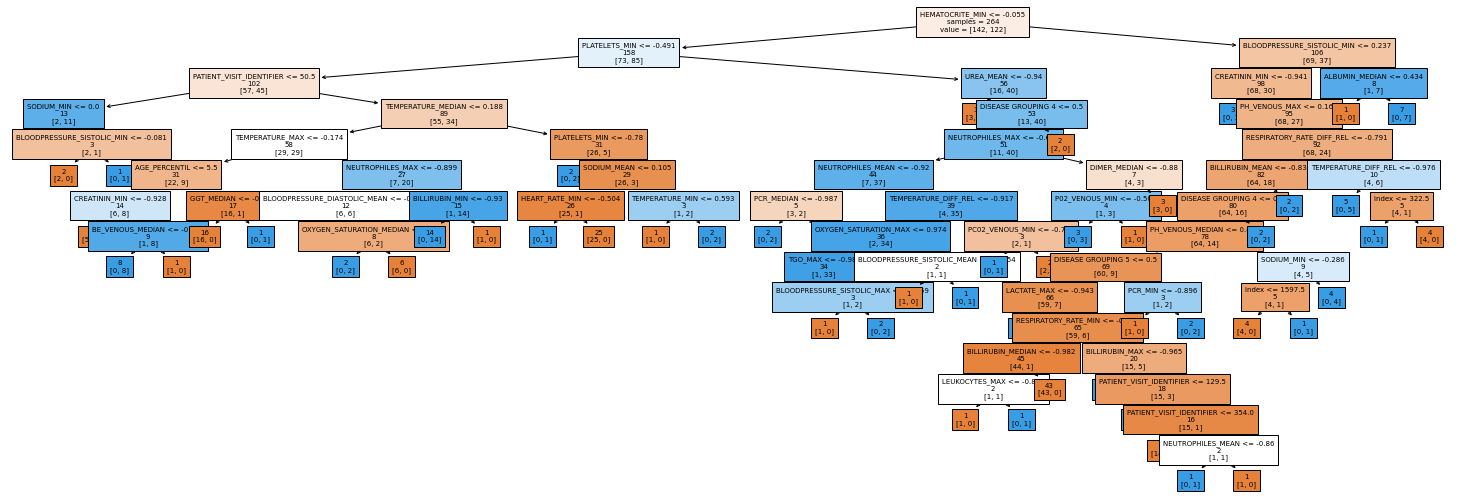

In [42]:
plt.figure(figsize=(26,9))

feature_names = x_train.columns

plot_tree(DTC_model, filled=True, impurity=False, fontsize=7,
          feature_names=feature_names, label='root');

parameters explanation:

filled: When set to True, paint nodes to indicate majority class for classification, extremity of values for regression, or purity of node for multi-output.

impurity: When set to True, show the impurity at each node.

label: Whether to show informative labels for impurity, etc. Options include ‘all’ to show at every node, ‘root’ to show only at the top root node, or ‘none’ to not show at any node.

## Lesson 02 - Part 02 - ROC and AUC curves

Recap:

- Precision: de todas as minhas predições positivas, quantas realmente estão certas?

- Recall: de todas as classes que devem ser positivas, quantas eu realmente classifiquei, previ corretamente? \
Recall == 1 quer dizer que todas as pessoas que estavam doentes eu consegui classificar como doentes.

- Through ROC we can compare **visually** with model performed better.

- The AUC (area under curve) represents the ROC metric through a number.


**Challenge 04: Plot ROC.**

In [43]:
from sklearn.metrics import roc_auc_score

In [44]:
DTC_model.predict_proba(x_test)

# first column is the chance of the class be classified as 0
# second column is the chance of the class be classified as 1

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.

In [45]:
# just to check the order 

DTC_model.classes_

# first column is about class 0
# second column is about class 1

array([0, 1])

In [46]:
proba_DTC = DTC_model.predict_proba(x_test)
roc_auc_score(y_test, proba_DTC[:, 1])

0.416969382459782

In [47]:
proba_LR = LR_model.predict_proba(x_test)
roc_auc_score(y_test, proba_LR[:, 1])

0.4187856772184743

In [48]:
def run_model(model, data):
    
    x_columns = data.columns

    x = data[x_columns].drop(['ICU', 'WINDOW'], 
                             axis=1)
    y = data['ICU']
    
    x_train, x_test, y_train, y_test = \
        train_test_split(x, y, stratify=y)
    
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    proba_predict = model.predict_proba(x_test)
    
    auc = roc_auc_score(y_test, proba_predict[:, 1])
    print(f"AUC: {auc}")

    print("\nClassification report")
    print(classification_report(y_test, prediction))

In [49]:
run_model(DTC_model, patients_usable)

AUC: 0.5677218474312403

Classification report
              precision    recall  f1-score   support

           0       0.60      0.57      0.59        47
           1       0.53      0.56      0.55        41

    accuracy                           0.57        88
   macro avg       0.57      0.57      0.57        88
weighted avg       0.57      0.57      0.57        88



- Each time we run, it returns a different result. It happens because the train test split can split differently each time.

- **We need to reduce the effect of randomness!**

In [50]:
run_model(LR_model, patients_usable)

AUC: 0.7638816813700052

Classification report
              precision    recall  f1-score   support

           0       0.71      0.77      0.73        47
           1       0.70      0.63      0.67        41

    accuracy                           0.70        88
   macro avg       0.70      0.70      0.70        88
weighted avg       0.70      0.70      0.70        88



### Challenge 04: Create a function to plot ROC for different models.

In [54]:
from sklearn.metrics import roc_curve

Text(0.5, 0, 'False Positive Rate')

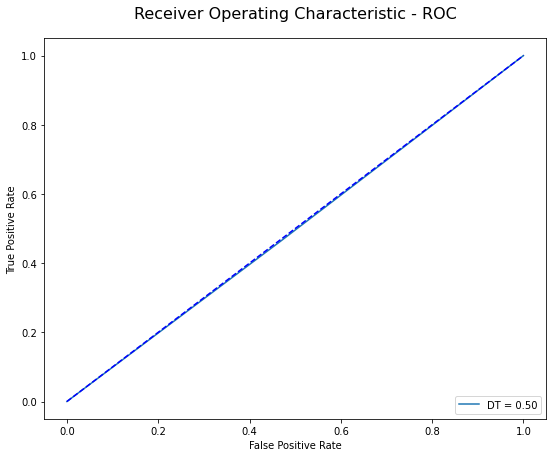

In [67]:
# TPR = Recall = TP / (TP + FN)
# FPR = FP / (FP + TN)

plt.figure(figsize=(9,7))
plt.title('Receiver Operating Characteristic - ROC', pad=20, fontsize=16)

proba_DTC = DTC_model.predict_proba(x_test)
fpr_DTC, tpr_DTC, _ = roc_curve(y_test, proba_DTC[:,1])

auc = roc_auc_score(y_test, proba_DTC[:,1])

plt.plot(fpr_DTC, tpr_DTC, label='DT = %0.2f' % auc)
plt.legend(loc = 'lower right')

plt.plot([0,1], [0,1], linestyle='--', color='blue')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [68]:
roc_curve(y_test, proba_DTC[:,1])

(array([0.        , 0.46808511, 1.        ]),
 array([0.        , 0.46341463, 1.        ]),
 array([2., 1., 0.]))

In [76]:
def plot_roc(models: list, x_test, y_test):
    
    plt.figure(figsize=(9,7))
    plt.title('Receiver Operating Characteristic - ROC', pad=20, fontsize=16)

    for model in models:
        
        proba = model.predict_proba(x_test)
        fpr, tpr, _ = roc_curve(y_test, proba[:,1])

        auc = roc_auc_score(y_test, proba[:,1])

        plt.plot(fpr, tpr, label= str(model)+' = %0.2f' % auc)
        plt.legend(loc = 'lower right')

    plt.plot([0,1], [0,1], linestyle='--', color='gray')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

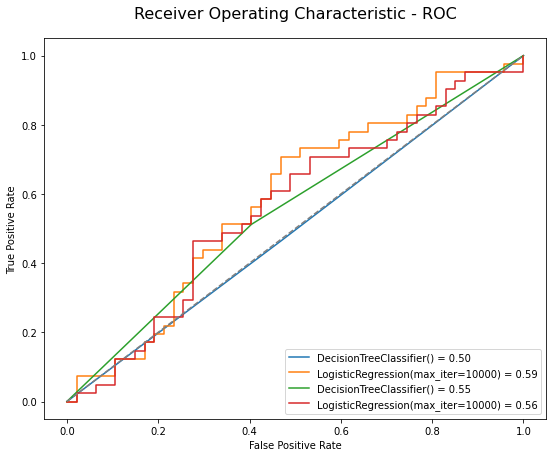

In [78]:
models = [DTC_model, LR_model, DTC_model_2, LR_model_2]

plot_roc(models, x_test, y_test)

### Challenge 05: How to reduce randomness? Don't search. Think about it.

Forcibly separating the train test.

Are there any parameters in the `train test split` method that can reduce randomness?

# Lesson 03 - Model Randomness

In [148]:
def run_n_models(model, data, n):
    
    x_columns = data.columns
    x = data[x_columns].drop(['ICU', 'WINDOW'], 
                             axis=1)
    y = data['ICU']
    
    auc_list = []
    
    for _ in range(n):
        
        x_train, x_test, y_train, y_test = \
            train_test_split(x, y, stratify=y)
    
        model.fit(x_train, y_train)
        proba_predict = model.predict_proba(x_test)
    
        auc = roc_auc_score(y_test, proba_predict[:, 1])
        auc_list.append(auc)
    
    auc_mean = np.mean(auc_list)
    auc_std = np.std(auc_list)
    print(f"AUC: {auc_mean}")
    print(f"Confidence Interval: {auc_mean - 2 * auc_std} - "+
                               f"{auc_mean + 2 * auc_std}")

In [149]:
run_n_models(DTC_model, patients_usable, 50)

AUC: 0.6442293720809549
Confidence Interval: 0.5561463251005105 - 0.7323124190613992


In [150]:
run_n_models(DTC_model, patients_usable, 50)

AUC: 0.6327244421380385
Confidence Interval: 0.5199754421900913 - 0.7454734420859856


- If we run again and again, I can notice that the variation now becomes smaller, since we are averaging the metrics obtained in N models.

In [122]:
run_n_models(LR_model, patients_usable, 50)

AUC: 0.7574675661650234
Confidence Interval: 0.6674636214533318 - 0.847471510876715


In [123]:
run_n_models(LR_model, patients_usable, 50)

AUC: 0.755412558380903
Confidence Interval: 0.6608012646097372 - 0.8500238521520689


### Challenge 01: Study scikit learn documentation. Test others models.

In [139]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

In [131]:
KNN_model = KNeighborsClassifier()

run_n_models(KNN_model, patients_usable, 50)

AUC: 0.5154488842760767
Confidence Interval: 0.4179220206706167 - 0.6129757478815367


In [132]:
RF_model = RandomForestClassifier()

run_n_models(RF_model, patients_usable, 50)

AUC: 0.7926984950700571
Confidence Interval: 0.723361527630099 - 0.8620354625100152


In [135]:
GNB_model = GaussianNB()

run_n_models(GNB_model, patients_usable, 50)

AUC: 0.7393772703684485
Confidence Interval: 0.646564834665153 - 0.8321897060717439


In [144]:
SVM_model = SVC(probability=True)

run_n_models(SVM_model, patients_usable, 50)

AUC: 0.4159782044628957
Confidence Interval: 0.20848025125540762 - 0.6234761576703838


In [152]:
SGD_model = SGDClassifier(loss='log')

run_n_models(SGD_model, patients_usable, 50)

AUC: 0.5058796056045667
Confidence Interval: 0.44790100116562087 - 0.5638582100435124
